In [1]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
import matplotlib.pyplot as plt
import numpy as np
from load_arrays import*
from financial_analysis_costs import*


In [4]:
base_case = financial_analysis([2.94, 3.45, 3.9, 4.56, 5.24, 6.03])
cap, dwn_pmt, _, _ = base_case.capital_cost(
    [2.94, 3.45, 3.9, 4.56, 5.24, 6.03], level_of_subsidy=.25)
operating_costs, _, _ = base_case.pv_oper()
insurance_premium, _ = base_case.pv_insurance()
_, mortgage_payment, _, _ = base_case.pv_mortgage()
property_tax, _ = base_case.pv_propertytax()
_, Total_lifecycle_costs_tax2 = base_case.TLCC()
# print(Total_lifecycle_costs_tax2[0,21,180])
Levelized_cost_of_energy_1, Levelized_cost_of_energy_2 = base_case.LCOE()
# print(Levelized_cost_of_energy_1[0,21,180],Levelized_cost_of_energy_2[0,21,180])
npv, _ = base_case.npv()
np.save("TLCC_25", Total_lifecycle_costs_tax2)
np.save("LCOE_25",Levelized_cost_of_energy_2 )

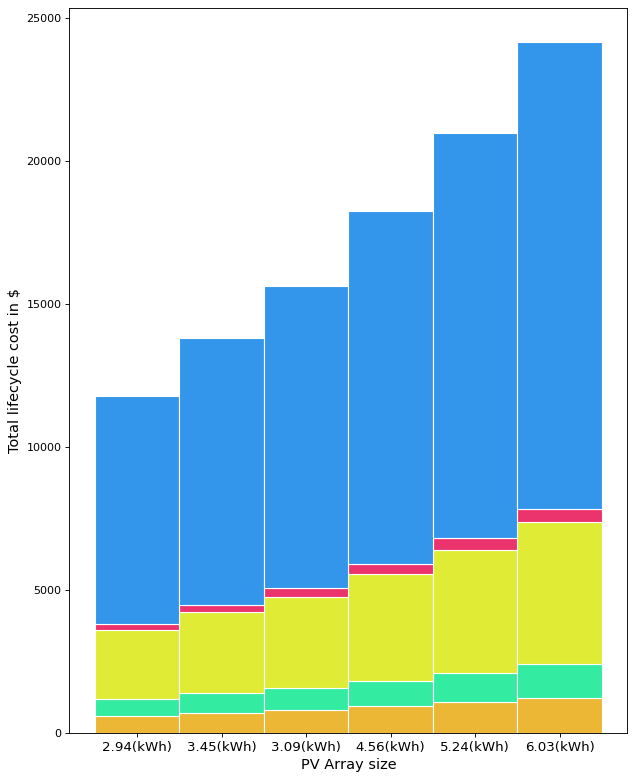

In [3]:
# TLCC Scenario1
plt.figure(num=None, figsize=(9, 12), dpi=80, facecolor='w', edgecolor='k')
down_payment = dwn_pmt.T.tolist()
operations = operating_costs.reshape(6, 1).tolist()
mortgage = mortgage_payment.reshape(6, 1).tolist()
insurance = insurance_premium.reshape(6, 1).tolist()
propertytax = property_tax.reshape(6, 1).tolist()

# flatten lists
down_payment = [item for sublist in down_payment for item in sublist]
operations = [item for sublist in operations for item in sublist]
mortgage = [item for sublist in mortgage for item in sublist]
insurance = [item for sublist in insurance for item in sublist]
propertytax = [item for sublist in propertytax for item in sublist]

# Heights of bars1 + bars2
bars = np.add(down_payment, operations).tolist()
# Heights of bars1 + bars2+ bars3
bars_2 = np.add(bars, mortgage).tolist()
# Heights of bars1 + bars2+ bars3+ bars4
bars_3 = np.add(bars_2, insurance).tolist()

# The position of the bars on the x-axis
r = [0, 1, 2, 3, 4, 5]

# Names of group and bar width
names = ['2.94(kWh)', '3.45(kWh)', '3.09(kWh)',
         '4.56(kWh)', '5.24(kWh)', '6.03(kWh)']
barWidth = 1

# Create bars
plt.bar(r, down_payment, color='#ebb734', edgecolor='white',
        width=barWidth, label="downpayment")
# Create bars (middle), on top of the firs ones
plt.bar(r, operations, bottom=down_payment, color='#34eba2',
        edgecolor='white', width=barWidth, label="O&M cost")
# Create bars (top)
plt.bar(r, mortgage, bottom=bars, color='#dfeb34',
        edgecolor='white', width=barWidth, label="mortgage payment")
# Create bars (top)
plt.bar(r, insurance, bottom=bars_2, color='#eb346e',
        edgecolor='white', width=barWidth, label="insurance premiums")
# Create bars (further)
plt.bar(r, propertytax, bottom=bars_3, color='#3496eb',
        edgecolor='white', width=barWidth, label="property tax")

# Custom X axis
plt.xticks(r, names, fontsize=12)
plt.xlabel("PV Array size", fontsize=13)
plt.ylabel("Total lifecycle cost in $", fontsize=13)
# plt.legend()
plt.savefig("TLCC scenario1", bbox_inches="tight")


# Show graphic
plt.show()


In [4]:
x = np.arange(361)
y = np.arange(10, 61)
X, Y = np.meshgrid(x, y)
def plot_subplots(idx, title_string, flag, subplot_id, data_mat):
    plt.xticks(np.arange(0, 361, step=30))
    plt.xlabel("Azimuth", fontsize=13)
    plt.ylabel("angle of inclination", fontsize=13)
    
    if flag == True:
        ax_F = plt.subplot(6, subplot_id[0], subplot_id[1])        
        break_even_taxcredit = data_mat[idx] + pv_b1[idx]
        b_e = (break_even_taxcredit < 0).astype(int)
        plt.scatter(X, Y, c=b_e, s=30, cmap='Pastel1')
        ax_F.set_title(title_string, size=15)        
    else:
        ax_F = plt.subplot(6, subplot_id[0], subplot_id[1])
        plt.scatter(X, Y, c=data_mat[idx], s=15, cmap='inferno')
        ax_F.set_title(title_string, size=15)
        plt.colorbar()

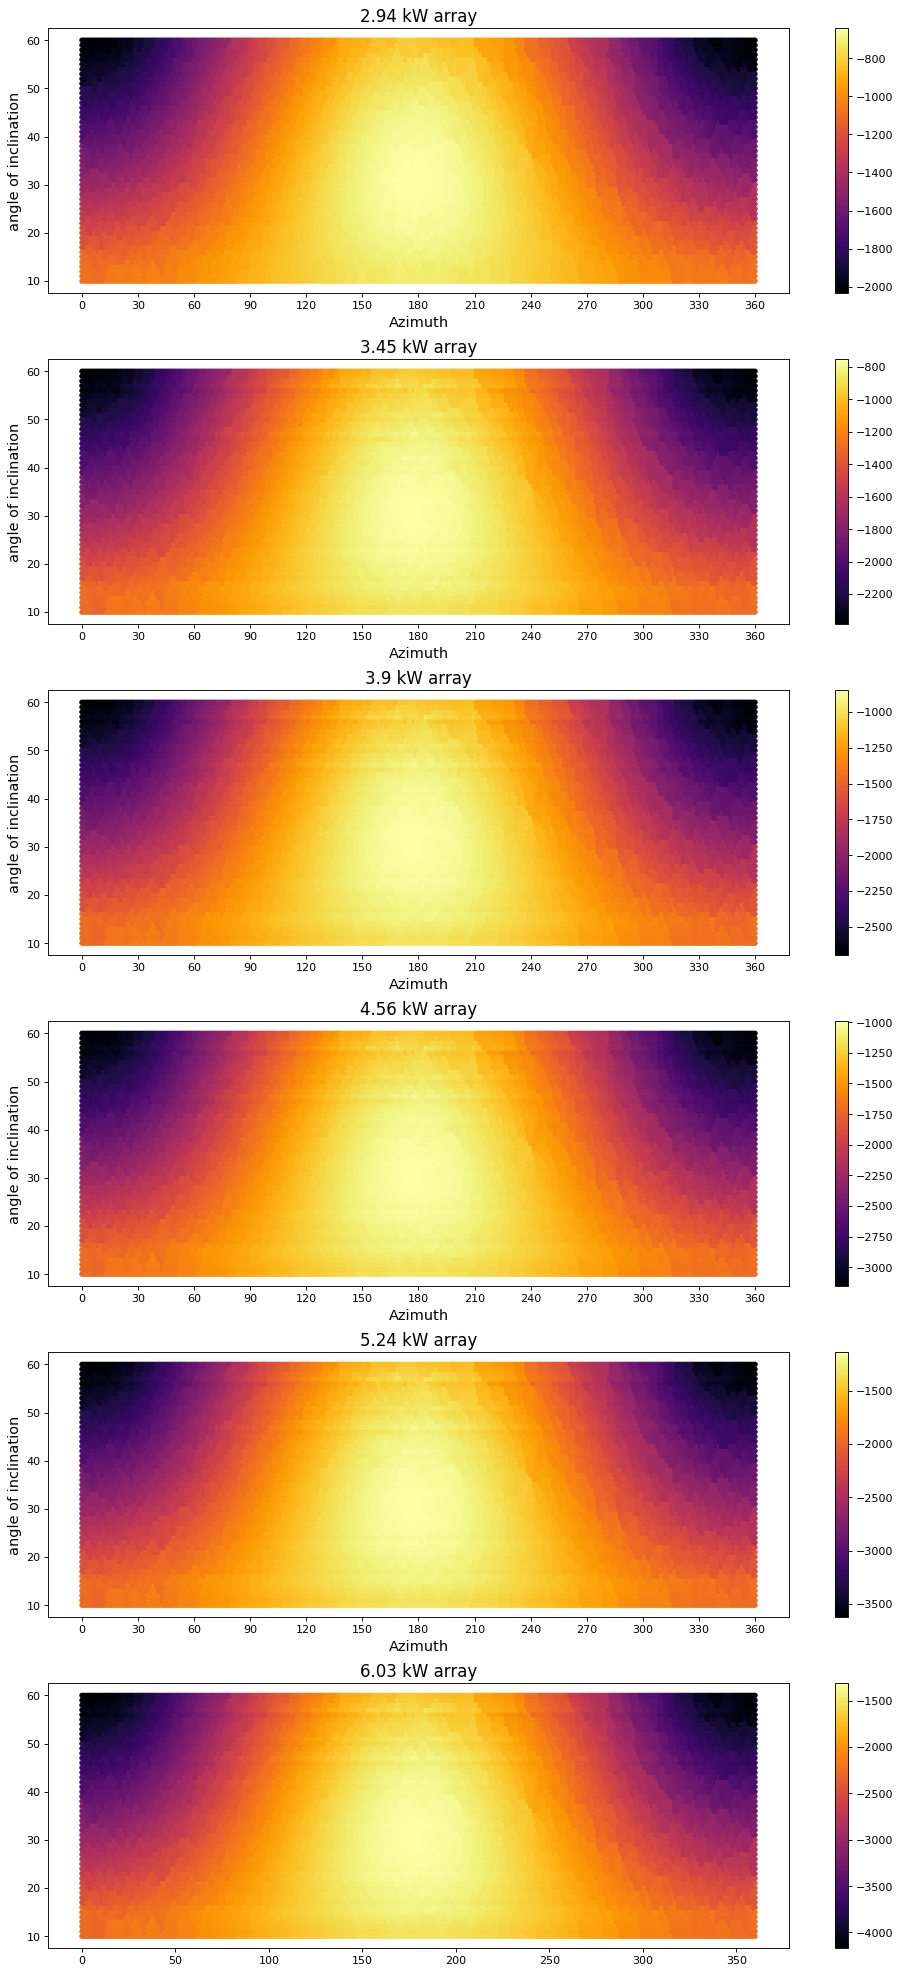

In [5]:
# NPV
plt.figure(num=None, figsize=(30, 24), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=None, bottom=3, right=None, top=4, wspace=.01, hspace=.25)


plot_subplots(idx=0, title_string='2.94 kW array', 
              flag=False, subplot_id=(2, 1), data_mat=npv)

plot_subplots(idx=1, title_string='3.45 kW array', flag=False, 
              subplot_id=(2,3), data_mat=npv)

plot_subplots(idx=2, title_string='3.9 kW array', 
              flag=False, subplot_id=(2,5), data_mat=npv)

plot_subplots(idx=3, title_string='4.56 kW array', 
              flag=False, subplot_id=(2, 7), data_mat=npv)

plot_subplots(idx=4, title_string='5.24 kW array', 
              flag=False, subplot_id=(2, 9), data_mat=npv)

plot_subplots(idx=5, title_string='6.03 kW array', 
              flag=False, subplot_id=(2, 11), data_mat=npv)
plt.savefig("NPV_Scenario_1", bbox_inches="tight")

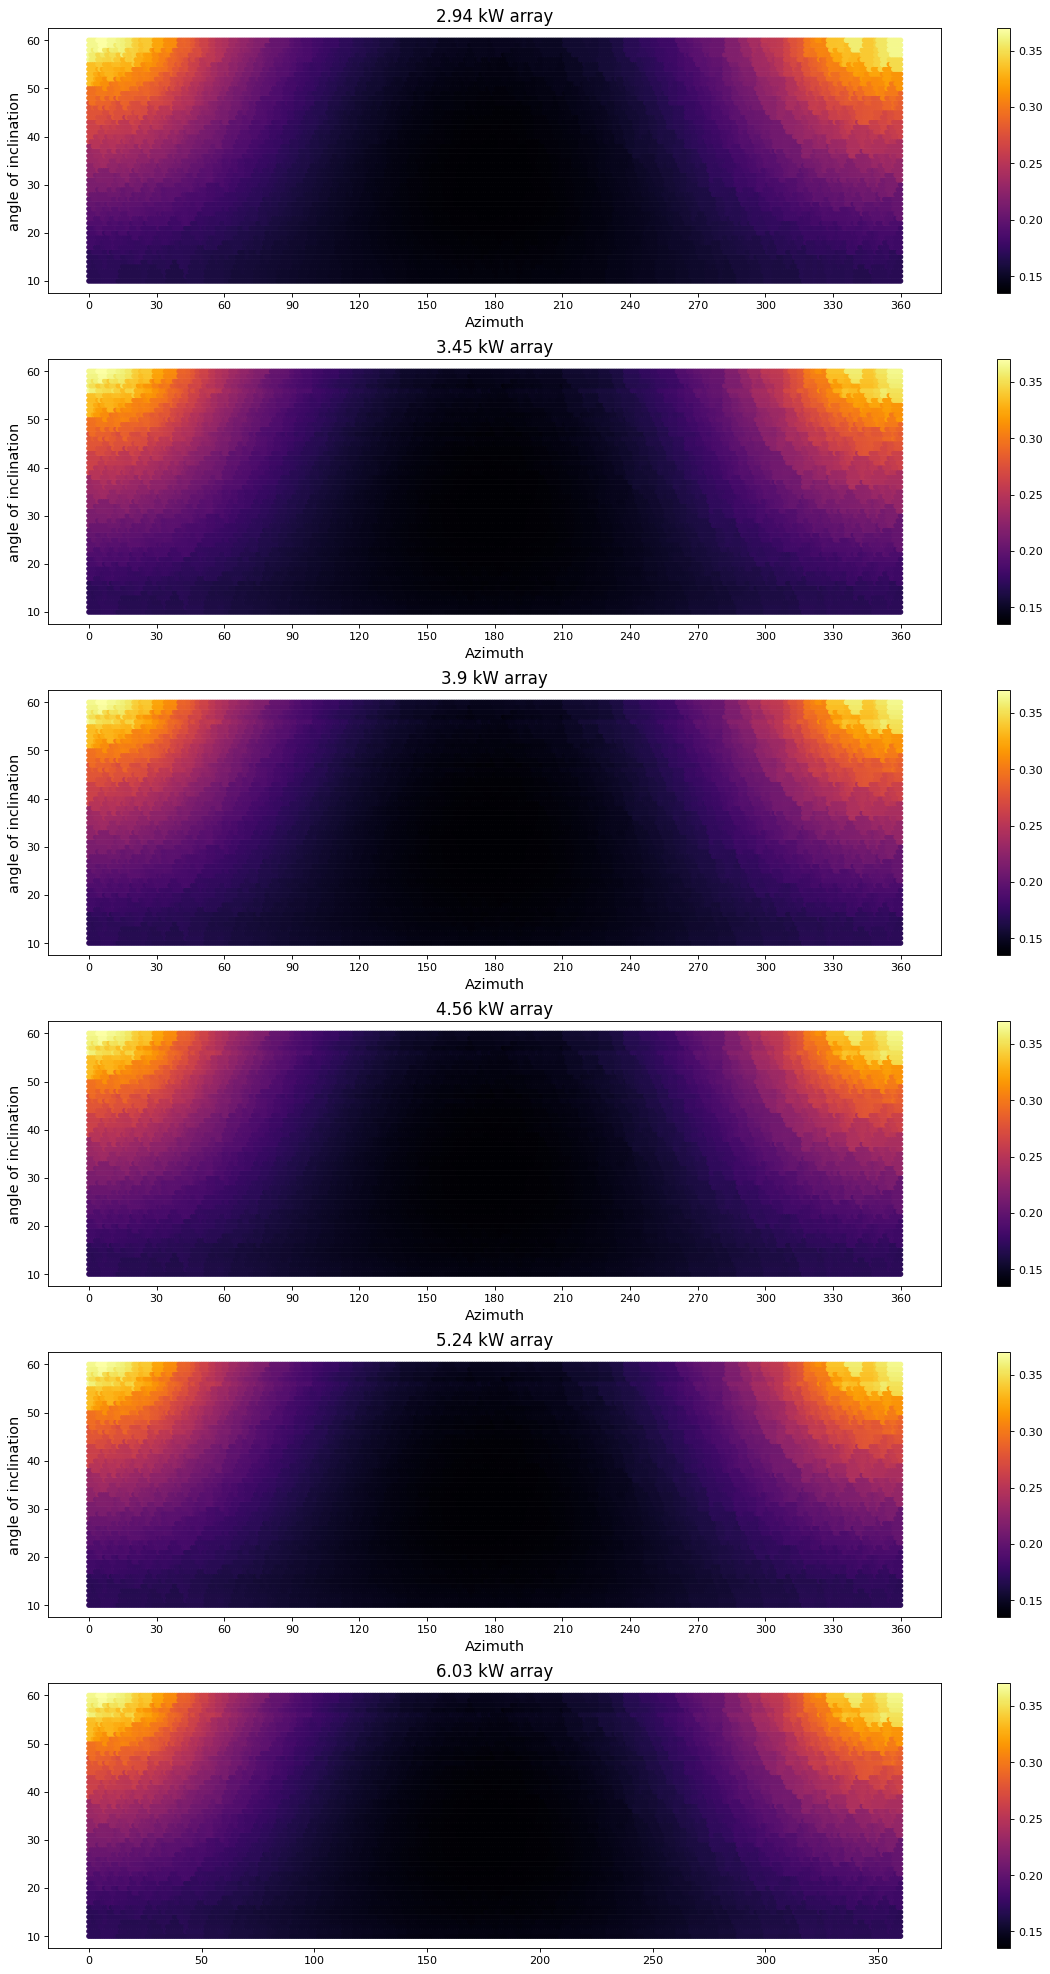

In [6]:
# LCOE Scenario 1
plt.figure(num=None, figsize=(18, 24), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=None, bottom=3, right=None, top=4, wspace=None, hspace=.25)

plot_subplots(idx=np.arange(len(Levelized_cost_of_energy_1[0])), title_string='2.94 kW array', 
              flag=False, subplot_id=(1, 1), data_mat=Levelized_cost_of_energy_1[0])

plot_subplots(idx=np.arange(len(Levelized_cost_of_energy_1[1])), title_string='3.45 kW array', 
              flag=False, subplot_id=(1, 2), data_mat=Levelized_cost_of_energy_1[1])

plot_subplots(idx=np.arange(len(Levelized_cost_of_energy_1[2])), title_string='3.9 kW array', 
              flag=False, subplot_id=(1, 3), data_mat=Levelized_cost_of_energy_1[2])

plot_subplots(idx=np.arange(len(Levelized_cost_of_energy_1[3])), title_string='4.56 kW array', 
              flag=False, subplot_id=(1, 4), data_mat=Levelized_cost_of_energy_1[3])

plot_subplots(idx=np.arange(len(Levelized_cost_of_energy_1[4])), title_string='5.24 kW array', 
              flag=False, subplot_id=(1, 5), data_mat=Levelized_cost_of_energy_1[4])

plot_subplots(idx=np.arange(len(Levelized_cost_of_energy_1[5])), title_string='6.03 kW array', 
              flag=False, subplot_id=(1, 6), data_mat=Levelized_cost_of_energy_1[5])

plt.savefig("LCOE scenario1", bbox_inches="tight")

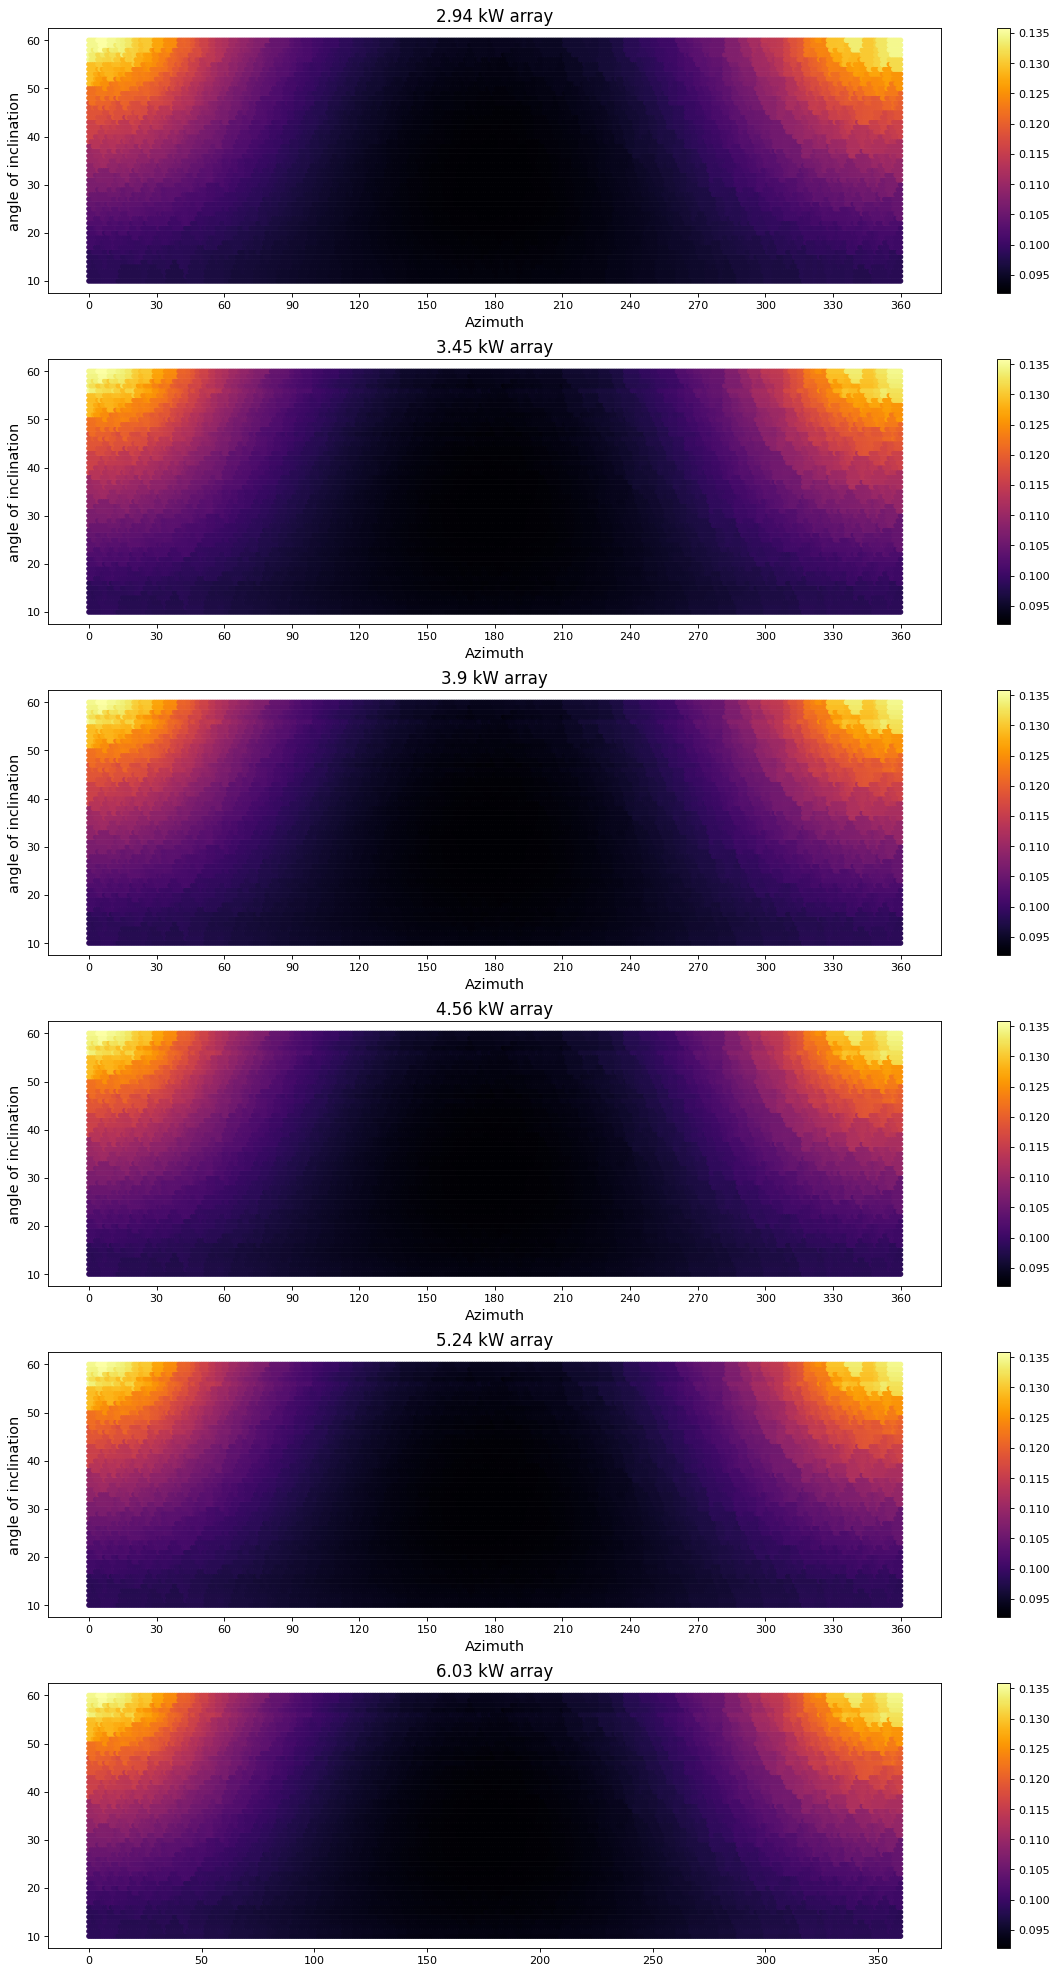

In [7]:
# LCOE Scenario 2
plt.figure(num=None, figsize=(18, 24), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=None, bottom=3, right=None, top=4, wspace=None, hspace=.25)

plot_subplots(idx=np.arange(len(Levelized_cost_of_energy_2[0])), title_string='2.94 kW array', 
              flag=False, subplot_id=(1, 1), data_mat=Levelized_cost_of_energy_2[0])

plot_subplots(idx=np.arange(len(Levelized_cost_of_energy_2[1])), title_string='3.45 kW array', 
              flag=False, subplot_id=(1, 2), data_mat=Levelized_cost_of_energy_2[1])

plot_subplots(idx=np.arange(len(Levelized_cost_of_energy_2[2])), title_string='3.9 kW array', 
              flag=False, subplot_id=(1, 3), data_mat=Levelized_cost_of_energy_2[2])

plot_subplots(idx=np.arange(len(Levelized_cost_of_energy_2[3])), title_string='4.56 kW array', 
              flag=False, subplot_id=(1, 4), data_mat=Levelized_cost_of_energy_2[3])

plot_subplots(idx=np.arange(len(Levelized_cost_of_energy_2[4])), title_string='5.24 kW array', 
              flag=False, subplot_id=(1, 5), data_mat=Levelized_cost_of_energy_2[4])

plot_subplots(idx=np.arange(len(Levelized_cost_of_energy_2[5])), title_string='6.03 kW array', 
              flag=False, subplot_id=(1, 6), data_mat=Levelized_cost_of_energy_2[5])

plt.savefig("LCOE scenario2", bbox_inches="tight")

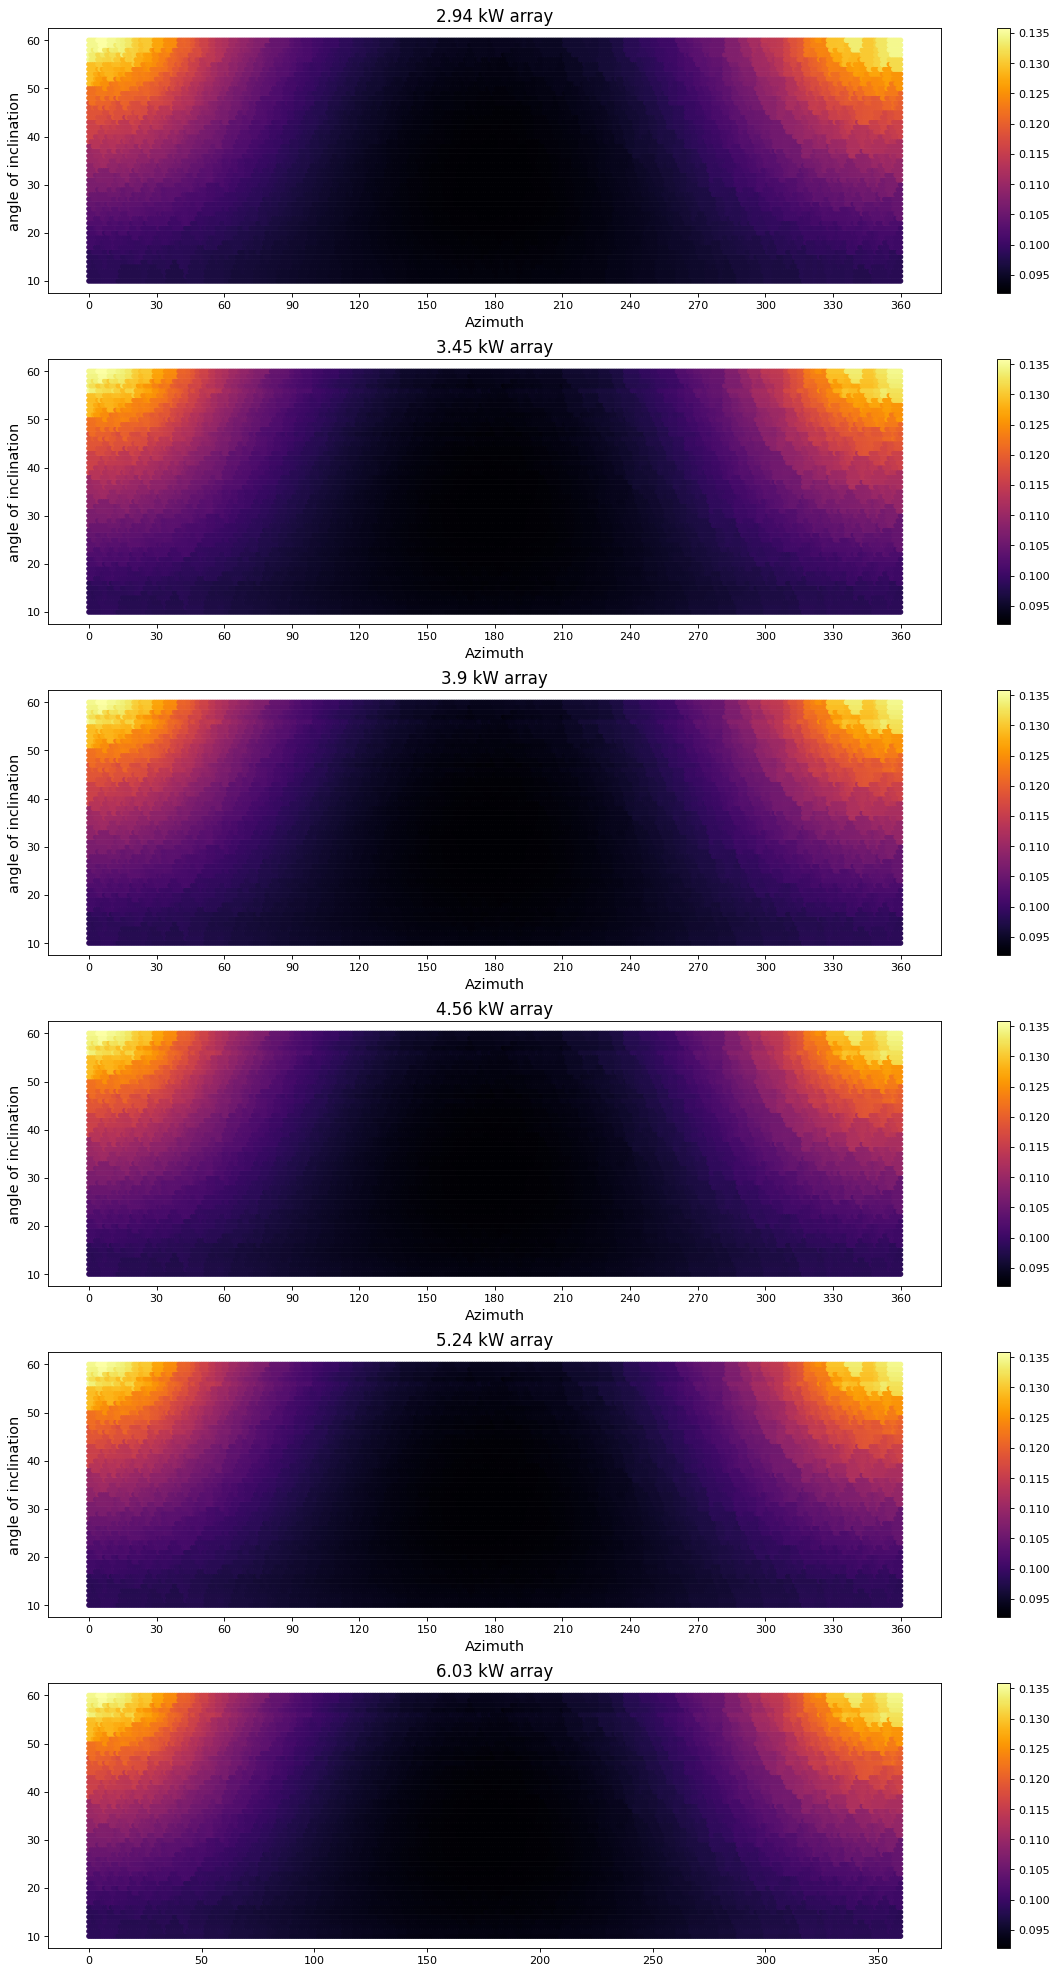

In [8]:
# TLCC Scenario 2
plt.figure(num=None, figsize=(18, 24), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=None, bottom=3, right=None, top=4, wspace=None, hspace=.25)

plot_subplots(idx=np.arange(len(Levelized_cost_of_energy_2[0])), title_string='2.94 kW array', 
              flag=False, subplot_id=(1, 1), data_mat=Levelized_cost_of_energy_2[0])

plot_subplots(idx=np.arange(len(Levelized_cost_of_energy_2[1])), title_string='3.45 kW array', 
              flag=False, subplot_id=(1, 2), data_mat=Levelized_cost_of_energy_2[1])

plot_subplots(idx=np.arange(len(Levelized_cost_of_energy_2[2])), title_string='3.9 kW array', 
              flag=False, subplot_id=(1, 3), data_mat=Levelized_cost_of_energy_2[2])

plot_subplots(idx=np.arange(len(Levelized_cost_of_energy_2[3])), title_string='4.56 kW array', 
              flag=False, subplot_id=(1, 4), data_mat=Levelized_cost_of_energy_2[3])

plot_subplots(idx=np.arange(len(Levelized_cost_of_energy_2[4])), title_string='5.24 kW array', 
              flag=False, subplot_id=(1, 5), data_mat=Levelized_cost_of_energy_2[4])

plot_subplots(idx=np.arange(len(Levelized_cost_of_energy_2[5])), title_string='6.03 kW array', 
              flag=False, subplot_id=(1, 6), data_mat=Levelized_cost_of_energy_2[5])

plt.savefig("TLCC scenario2", bbox_inches="tight")